#### Introduction

This notebook shows how PCA can be applied to reduce dimensionality of a high dimensional dataset MNIST which is dataset of handwritten digits between 0 to 9 where each datapoint is 8x8 image of integer pixels in the range 0 to 16 & can be represented as a vector of 64 dimensions. sklearn MNIST have 5620 images. More details of MNIST can be found on this [link](https://scikit-learn.org/stable/datasets/index.html#optical-recognition-of-handwritten-digits-dataset).

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns

In [17]:
#Loading MNIST dataset from sklearn datasets
from sklearn.datasets import load_digits
digits = load_digits()
#digits = datasets.load_digits()
X = digits.data   #image
y = digits.target #label

In [18]:
#MNIST is a 64 dimensional dataset
X.shape

(1797, 64)

In [19]:
#Checking first image in dataset
images = digits.images
print(images[0],y[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]] 0


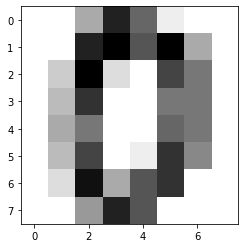

In [20]:
plt.imshow(images[0], cmap=plt.cm.gray_r, interpolation='nearest')

Text(0, 0.5, 'Cumulative explained variance')

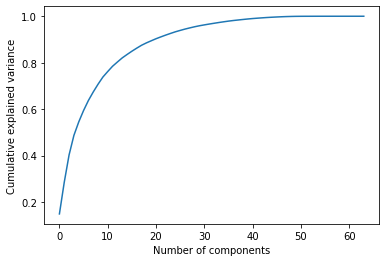

In [21]:
#Checking cumulative variance using PCA by applying PCA using all dimensions to observe change in variance with number of components
pca = PCA(64)
pca_full = pca.fit(X)

plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [22]:
#Reducing dimensions to 15 using PCA, as there is an elbow near 15 there is a small change in variance afterwards
pca = PCA(n_components=15)
pca.fit(X)

PCA(n_components=15)

In [23]:
#Checking explained variance
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[179.0069301  163.71774688 141.78843909 101.10037519  69.51316552
  59.10852461  51.88453823  44.01510105  40.31099457  37.01179628
  28.51900532  27.32108812  21.90070606  21.32410425  17.63479391]
[0.14890594 0.13618771 0.11794594 0.08409979 0.05782415 0.0491691
 0.04315987 0.03661372 0.03353248 0.03078806 0.02372338 0.0227269
 0.01821798 0.01773834 0.01466941]
[0.14890594 0.28509365 0.40303959 0.48713938 0.54496353 0.59413263
 0.6372925  0.67390622 0.7074387  0.73822676 0.76195014 0.78467704
 0.80289502 0.82063336 0.83530277]


So 83.5% of variance is retained after reducing dimensions from 64 to 15 using PCA with respective variance of each component shown above in second list above

In [24]:
#Reducing components further to 2 and visualize resulting principal components
pca = PCA(n_components=2)
pca = pca.fit_transform(X)
pca

array([[ -1.25946398,  21.27487924],
       [  7.95761005, -20.76869166],
       [  6.99191952,  -9.95598441],
       ...,
       [ 10.80128787,  -6.96026381],
       [ -4.87209863,  12.42394642],
       [ -0.34438467,   6.36553299]])

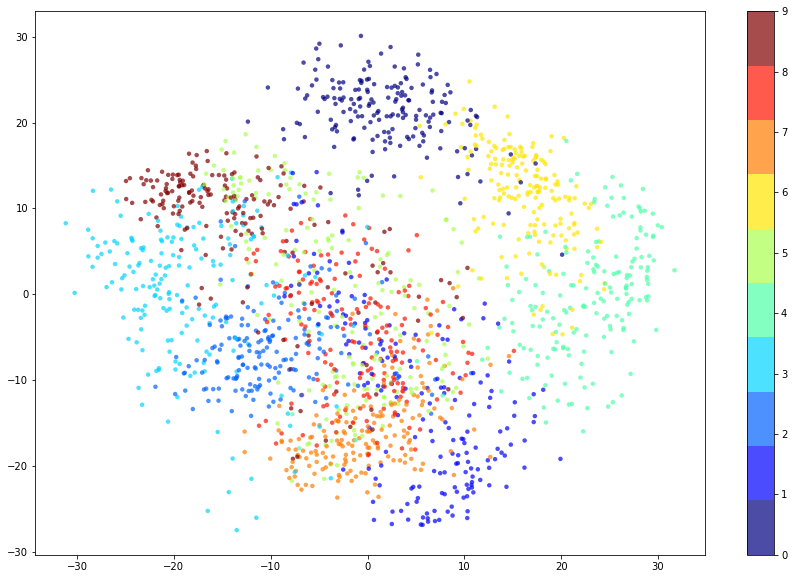

In [25]:
plt.figure(figsize=(15,10))
plt.scatter(pca[:,0], pca[:,1], c=y, edgecolor='none', alpha=0.7,
           cmap=plt.get_cmap('jet', 10), s=20)
plt.colorbar()

In [26]:
#Visulaizing using 3 principal components now
pca = PCA(n_components=3)
pca = pca.fit_transform(X)

C:\Users\kancs\AppData\Local\Temp/ipykernel_3268/393713423.py:1: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.figure(figsize=(16,12)).gca(projection='3d')


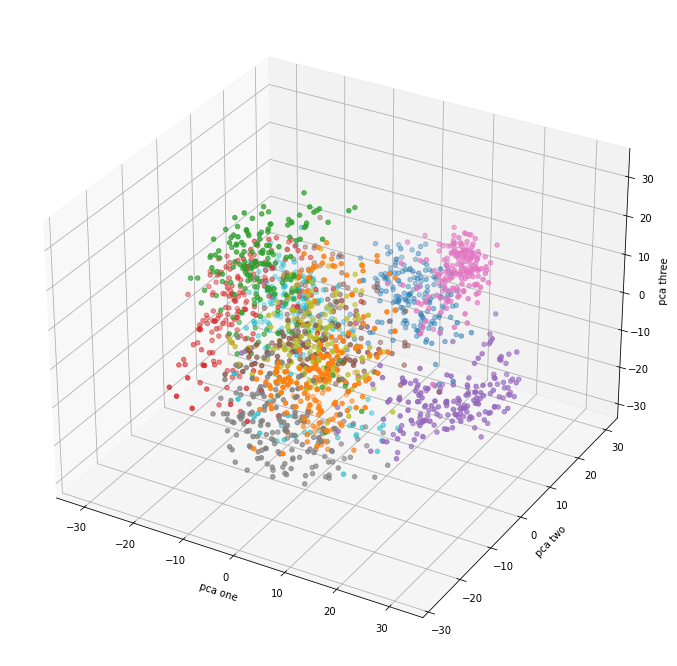

In [27]:
ax = plt.figure(figsize=(16,12)).gca(projection='3d')
ax.scatter(
    xs=pca[:,0], 
    ys=pca[:,1], 
    zs=pca[:,2], 
    c=y, 
    cmap='tab10'
)
ax.set_xlabel('pca one')
ax.set_ylabel('pca two')
ax.set_zlabel('pca three')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'corr'

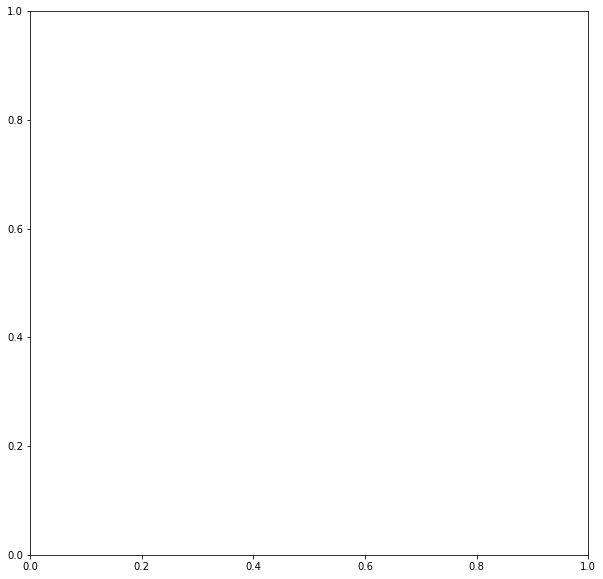